In [1]:
import numpy as np
import matplotlib
from matplotlib import animation
from matplotlib import pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

# Create the environment, value table and policy

In [2]:
def render_env(env):
    frame = env.render(mode='rgb_array')
    plt.axis('off')
    plt.imshow(frame)
    return frame

### Create the environment

In [3]:
env = Maze()

### Create the Q(s, a) table

In [17]:
action_values = np.zeros((5, 5, 4))

### Create the policy

In [18]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

### Plot the policy

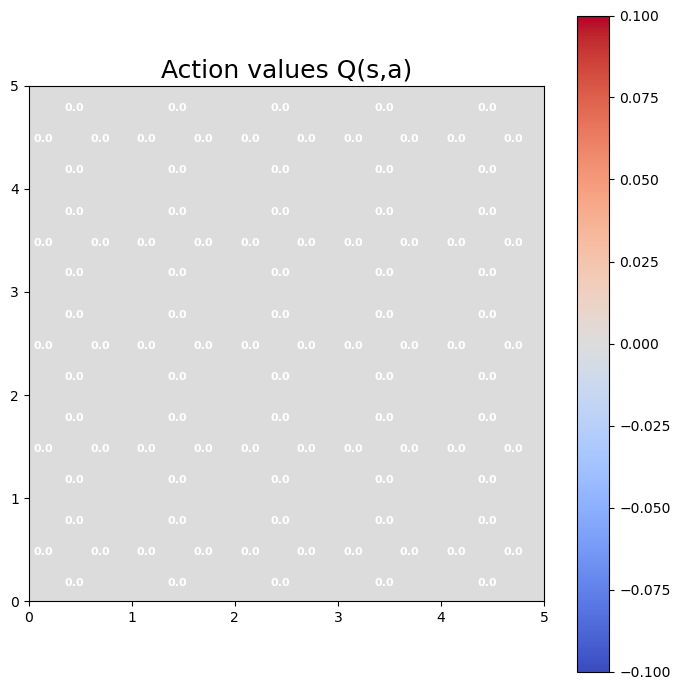

In [19]:
plot_action_values(action_values)

### Plot the policy

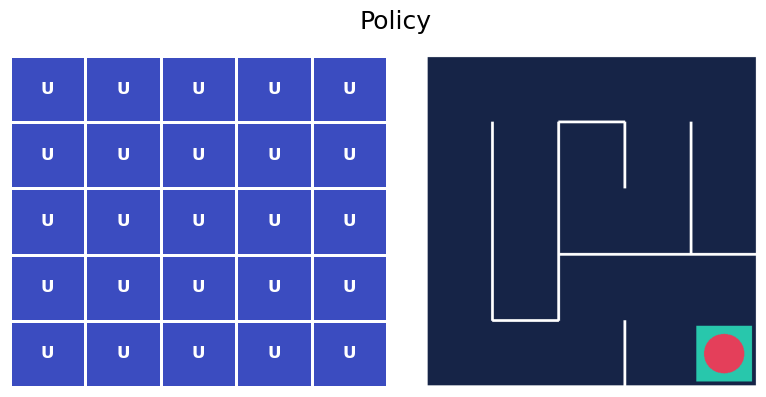

In [20]:
plot_policy(action_values, env.render(mode='rgb_array'))

### Implement the algorithm

In [21]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2, n=8):

    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0

        while t - n < len(transitions):
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])

            if t >= n:
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G

                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])

            t += 1
            state = next_state
            action = next_action

In [22]:
n_step_sarsa(action_values, policy, episodes=1000)

# Show results

### Show resuting value table Q(s, a)

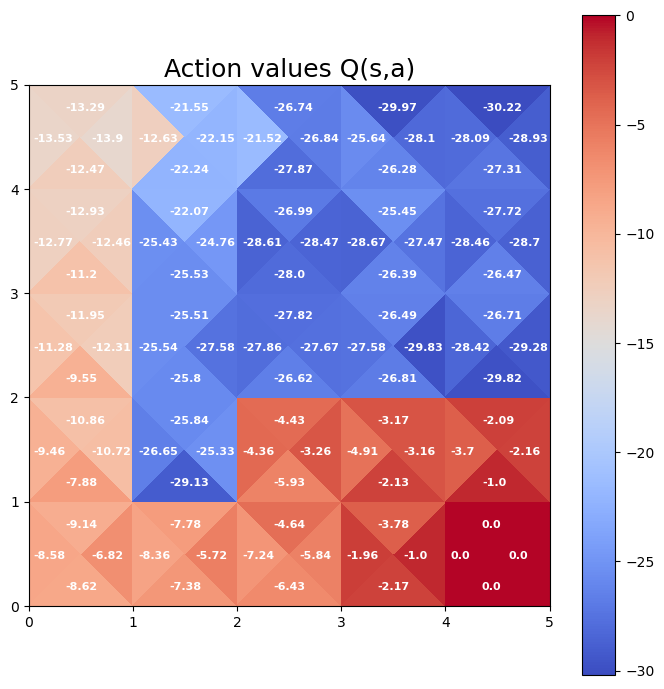

In [23]:
plot_action_values(action_values)

### Show resulting policy

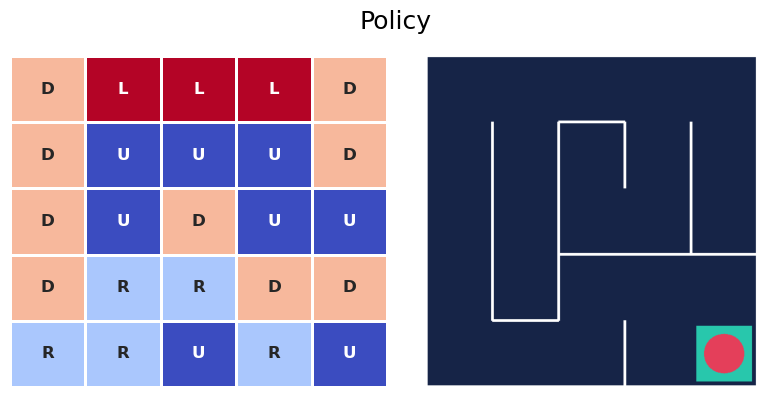

In [24]:
plot_policy(action_values, env.render(mode='rgb_array'))

### Test the result agent

In [25]:
test_agent(env, policy, episodes=1)